# Mean Shift Clustering

## Step 1: Environment

In [4]:
import numpy as np
import pandas as pd

from sklearn.cluster import  MeanShift, estimate_bandwidth

from sklearn import metrics
import matplotlib.pyplot as plt


from scipy.spatial.distance import cdist

import seaborn as sns
import plotly.express as pxp
import plotly.graph_objs as gph


## Step 2: Data Preparation

In [5]:
!pwd

'pwd' is not recognized as an internal or external command,
operable program or batch file.


In [6]:
# Load input data
# X = np.loadtxt('../data/data_clustering.txt', delimiter=',')
data = pd.read_csv('.\Data\clustering.txt', delimiter=',')
data

,2.08,1.05
0,2.05,7.70
1,4.53,5.49
2,6.23,1.02
3,5.35,7.86
4,2.88,0.79
...,...,...
344,2.92,2.97
345,3.10,8.19
346,5.83,5.42
347,6.54,3.08


In [7]:
data.shape

(349, 2)

In [8]:
data.head()

,2.08,1.05
0,2.05,7.70
1,4.53,5.49
2,6.23,1.02
3,5.35,7.86
4,2.88,0.79


In [9]:
# Select attributes and convert to numpy
X = data.iloc[:, :].values
X

array([[ 2.05,  7.7 ],
       [ 4.53,  5.49],
       [ 6.23,  1.02],
       [ 5.35,  7.86],
       [ 2.88,  0.79],
       [ 2.32,  8.5 ],
       [ 5.06,  5.65],
       [ 5.38,  3.53],
       [ 6.31,  9.73],
       [ 3.41,  2.05],
       [ 1.75,  7.38],
       [ 3.88,  5.73],
       [ 7.22,  2.88],
       [ 5.85,  9.11],
       [ 3.66,  2.38],
       [ 0.45,  7.99],
       [ 6.01,  5.83],
       [ 7.06,  2.41],
       [ 7.47,  8.97],
       [ 2.2 ,  2.71],
       [ 2.94,  8.71],
       [ 5.87,  4.56],
       [ 4.57,  1.33],
       [ 5.84,  6.54],
       [ 3.4 ,  1.  ],
       [ 1.44,  8.26],
       [ 4.29,  4.69],
       [ 8.09,  1.99],
       [ 6.48,  9.44],
       [ 2.94,  1.78],
       [ 0.41,  9.14],
       [ 5.42,  4.08],
       [ 7.47,  2.15],
       [ 5.62,  7.65],
       [ 3.71,  1.26],
       [ 0.41,  8.9 ],
       [ 4.93,  5.73],
       [ 7.23,  0.14],
       [ 6.77,  9.09],
       [ 3.23,  2.64],
       [ 1.61,  7.85],
       [ 4.7 ,  4.78],
       [ 6.86,  2.21],
       [ 5.

## Step 3: Train and Implement the Model

In [10]:
# Bandwidth is found automatically with
bandwidth = estimate_bandwidth(X, quantile=0.2, n_samples=200)
bandwidth 

2.2835781661394265

In [11]:
# Train mean-shift model with the data frame
msmodel = MeanShift(bandwidth=bandwidth, bin_seeding=True)
msmodel.fit(X)

MeanShift(bandwidth=2.2835781661394265, bin_seeding=True)

In [12]:
labels = msmodel.labels_
labels_unique = np.unique(labels)

In [13]:
n_clusters_ = len(labels_unique)
n_clusters_

5

In [14]:
# See the clusters and cluster centres
cluster_centers = msmodel.cluster_centers_
cluster_centers

array([[4.84210526, 4.89789474],
       [6.94373333, 2.23666667],
       [6.10216216, 8.46837838],
       [3.01694444, 2.03388889],
       [2.16142857, 8.038     ]])

In [15]:
# Predict the cluster for all the samples
Y = msmodel.predict(X)
Y

array([4, 0, 1, 2, 3, 4, 0, 0, 2, 3, 4, 0, 1, 2, 3, 4, 0, 1, 2, 3, 4, 0,
       3, 0, 3, 4, 0, 1, 2, 3, 4, 0, 1, 2, 3, 4, 0, 1, 2, 3, 4, 0, 1, 2,
       3, 4, 0, 1, 2, 3, 4, 0, 1, 2, 3, 4, 0, 1, 2, 3, 4, 0, 1, 2, 3, 4,
       0, 1, 2, 3, 4, 0, 1, 2, 3, 4, 2, 1, 2, 3, 4, 0, 1, 2, 3, 4, 0, 1,
       2, 3, 4, 0, 1, 2, 3, 4, 0, 1, 2, 3, 4, 0, 1, 2, 3, 4, 0, 1, 2, 3,
       4, 0, 1, 2, 3, 4, 4, 1, 2, 3, 4, 0, 1, 2, 3, 4, 0, 1, 2, 3, 4, 0,
       1, 2, 3, 4, 0, 1, 2, 3, 4, 0, 1, 2, 3, 4, 0, 1, 2, 3, 4, 0, 1, 2,
       3, 4, 0, 1, 2, 3, 4, 0, 1, 2, 3, 4, 0, 1, 2, 3, 4, 0, 1, 2, 3, 4,
       0, 1, 2, 3, 4, 0, 1, 2, 3, 4, 0, 1, 2, 3, 4, 0, 1, 2, 3, 4, 0, 1,
       2, 3, 4, 0, 1, 2, 3, 4, 0, 1, 2, 3, 4, 0, 1, 2, 3, 4, 0, 1, 2, 3,
       4, 0, 1, 2, 3, 4, 0, 1, 2, 3, 4, 0, 1, 2, 0, 4, 0, 1, 2, 3, 4, 0,
       1, 2, 3, 4, 0, 1, 2, 3, 4, 0, 1, 2, 3, 4, 0, 1, 2, 3, 4, 0, 1, 2,
       3, 4, 0, 1, 2, 3, 4, 0, 1, 2, 3, 2, 0, 1, 2, 3, 4, 0, 1, 2, 3, 4,
       0, 1, 2, 3, 4, 0, 1, 2, 3, 4, 0, 1, 2, 3, 4,

In [16]:
len(msmodel.labels_)

349

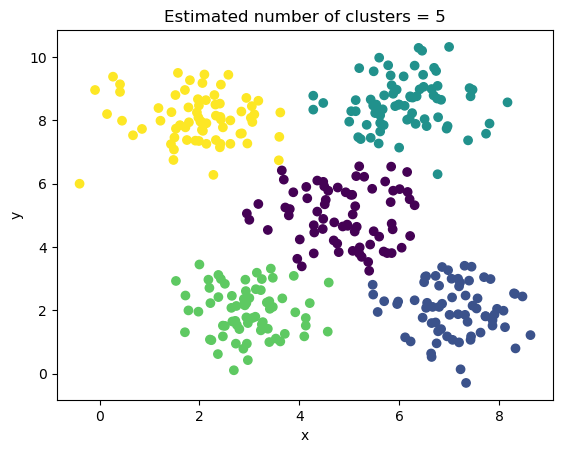

In [17]:
# Generate scatter plot for the training data
# colors = list(map(lambda x: '#3b4cc0' if x == 1 else '#b40426' if x == 2 else '#67c614', P))
# s - marker size, here, the dots size
# c - marker color, here taken from the predicted clusters
plt.scatter(X[:,0], X[:,1], c=labels, marker="o", picker=True)
plt.title(f'Estimated number of clusters = {n_clusters_}')
plt.xlabel('x')
plt.ylabel('y')
plt.show()

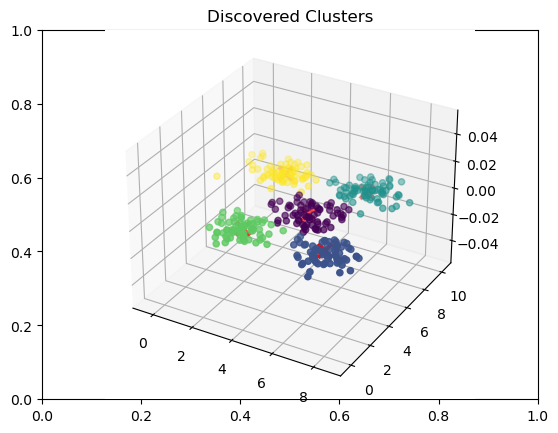

In [18]:
# Visualising the clusters in 3D
# Plot the points with color code of the predicted clusters
# viridis - a color map, https://matplotlib.org/users/colormaps.html
fig = plt.figure()
plt.title('Discovered Clusters')
ax = fig.add_subplot(111, projection='3d')
ax.scatter(X[:,0], X[:,1],  marker='o', cmap='viridis', c=labels)
ax.scatter(cluster_centers[:,0], cluster_centers[:,1], marker='x', 
           color='red', s=100, linewidth=3, zorder=10)
plt.show()

## Store the Model

In [19]:
!pip install joblib

DEPRECATION: textract 1.6.5 has a non-standard dependency specifier extract-msg<=0.29.*. pip 23.3 will enforce this behaviour change. A possible replacement is to upgrade to a newer version of textract or contact the author to suggest that they release a version with a conforming dependency specifiers. Discussion can be found at https://github.com/pypa/pip/issues/12063


In [20]:
# For serialization and deserialization of data from/to file
# from sklearn.externals import joblib
import joblib
joblib.dump(msmodel, '../deploy/msmodel.pkl')

FileNotFoundError: [Errno 2] No such file or directory: '../deploy/msmodel.pkl'